In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df2=df.copy()

In [6]:
df2["Age"]=df2["Age"].fillna(df2.groupby("Sex")["Age"].transform("mean"))
df2["Age"]=df2["Age"].fillna(df2["Age"].mean())

In [7]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X=df2[["Pclass","Age","SibSp","Parch","Fare"]]
Y=df2["Survived"]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")


In [10]:
log_reg.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr')

In [11]:
train_accuracy = log_reg.score(X_train, Y_train)
test_accuracy = log_reg.score(X_test, Y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.71
Accuracy on Test Data  : 0.69


In [12]:
log_reg_mnm = LogisticRegression(solver='lbfgs', multi_class="multinomial")
log_reg_mnm.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [13]:
train_accuracy = log_reg_mnm.score(X_train, Y_train)
test_accuracy = log_reg_mnm.score(X_test, Y_test)

print('Multinomial', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial
------------------------------
Accuracy on Train Data : 0.70
Accuracy on Test Data  : 0.69


In [14]:
df3= pd.concat([df2, pd.get_dummies(df2["Sex"], drop_first=True,prefix="is")], axis=1)
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
X2=df3[["Pclass","is_male","Age","SibSp","Parch","Fare"]]
Y2=df3["Survived"]

In [16]:
X2_train, X2_test, Y2_train, Y2_test =  train_test_split(X2, Y2, test_size=0.20, random_state=111)
log_reg2 = LogisticRegression(solver='lbfgs', multi_class="ovr")
log_reg2.fit(X2_train, Y2_train)

LogisticRegression(multi_class='ovr')

In [17]:
train_accuracy = log_reg2.score(X2_train, Y2_train)
test_accuracy = log_reg2.score(X2_test, Y2_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.80
Accuracy on Test Data  : 0.78


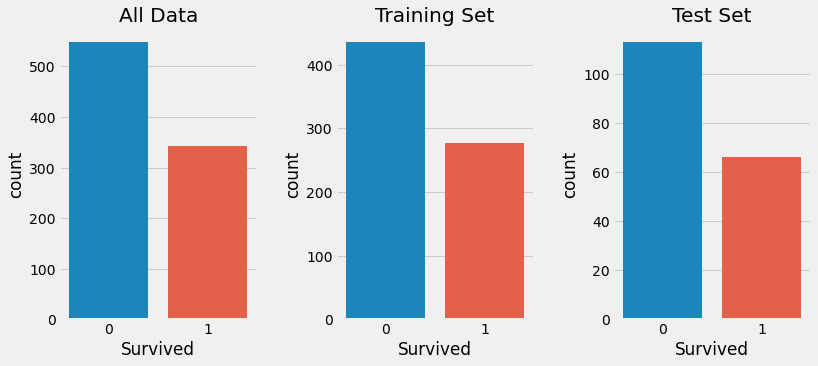

Proportion of '0' in all data     : %62 
Proportion of '0' in training set : %61 
Proportion of '0' in test set     : %63 


In [45]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(131)
sns.countplot(Y2)
plt.title("All Data")

plt.subplot(132)
sns.countplot(Y2_train)
plt.title("Training Set")

plt.subplot(133)
sns.countplot(Y2_test)
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(Y2[Y2==0])/len(Y2)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(Y2_train[Y2_train==0])/len(Y2_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(Y2_test[Y2_test==0])/len(Y2_test)*100))

In [22]:
log_reg2.score(X2_test,Y2_test)

0.776536312849162

In [25]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=7, shuffle=True, random_state=42)

In [26]:
pieces = kf.split(X2)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 763
No.1 Test set size     : 128
---------------------------- 

No.2 Train set size : 763
No.2 Test set size     : 128
---------------------------- 

No.3 Train set size : 764
No.3 Test set size     : 127
---------------------------- 

No.4 Train set size : 764
No.4 Test set size     : 127
---------------------------- 

No.5 Train set size : 764
No.5 Test set size     : 127
---------------------------- 

No.6 Train set size : 764
No.6 Test set size     : 127
---------------------------- 

No.7 Train set size : 764
No.7 Test set size     : 127
---------------------------- 



In [34]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X2)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X2.iloc[train_indeks,:], Y2[train_indeks]
    X_test, y_test = X2.iloc[test_indeks,:], Y2[test_indeks]
    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model2.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.836
----------------------- 

Piece No.2 score: 0.805
----------------------- 

Piece No.3 score: 0.748
----------------------- 

Piece No.4 score: 0.858
----------------------- 

Piece No.5 score: 0.780
----------------------- 

Piece No.6 score: 0.756
----------------------- 

Piece No.7 score: 0.780
----------------------- 



In [35]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.79


In [36]:
from sklearn.model_selection import cross_validate, cross_val_score

In [37]:
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X2,
                    y=Y2,
                    cv=10,
                    return_train_score=True
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.79775281 0.79800499 0.80299252 0.79551122 0.7967581  0.80174564
 0.8042394  0.80548628 0.79800499 0.8042394 ]
--------------------------------------------------
Test Scores     :
[0.78888889 0.78651685 0.74157303 0.82022472 0.80898876 0.76404494
 0.79775281 0.7752809  0.79775281 0.80898876]


In [38]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.8004735352629663
Mean score of test set  :  0.7890012484394506


In [40]:
cv = cross_validate(estimator=log_reg_model,
                    X=X2,
                    y=Y2,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'r2']
                   )

In [41]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}\n'.format(cv['train_precision'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))

Train Set Mean Accuracy  : 0.80  
Train Set Mean R-square  : 0.16  
Train Set Mean Precision : 0.76

Test Set Mean Accuracy   : 0.79  
Test Set Mean R-square   : 0.11  
Test Set Mean Precision  : 0.74  


In [42]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X2,
                     y=Y2,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')

Model Scores : 
[0.78888889 0.78651685 0.74157303 0.82022472 0.80898876 0.76404494
 0.79775281 0.7752809  0.79775281 0.80898876]


In [43]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(estimator=log_reg_model,
                           X=X2,
                           y=Y2,
                           cv=10,
                          )
print(y_pred[0:10])

[0 1 1 1 0 0 0 0 1 1]


---

# Hyperparameter Tuning

---

## 1. Grid Search

In [46]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [47]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X2, Y2)

GridSearchCV(cv=10, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [48]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 0.1, 'penalty': 'l2'}
Best Score      :  0.7912484394506867


In [49]:
import pandas as pd

results = grid_cv.cv_results_

df = pd.DataFrame(results)
display(df.head().iloc[:,:6])
df.info()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty
0,0.000800,0.001600,0.000000,0.000000,1e-05,l1
1,0.012405,0.002153,0.001202,0.001836,1e-05,l2
2,0.000800,0.001600,0.000000,0.000000,0.0001,l1
3,0.013056,0.001756,0.002596,0.001795,0.0001,l2
4,0.002004,0.001791,0.000000,0.000000,0.001,l1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_C            20 non-null     object 
 5   param_penalty      20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  10 non-null     float64
 8   split1_test_score  10 non-null     float64
 9   split2_test_score  10 non-null     float64
 10  split3_test_score  10 non-null     float64
 11  split4_test_score  10 non-null     float64
 12  split5_test_score  10 non-null     float64
 13  split6_test_score  10 non-null     float64
 14  split7_test_score  10 non-null     float64
 15  split8_test_score  10 non-null     float64
 16  split9_test_score  10 non-nu

In [50]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
9,l2,0.1,0.791248
11,l2,1,0.789001
13,l2,10,0.789001
15,l2,100,0.789001
17,l2,1000,0.789001
19,l2,10000,0.789001
7,l2,0.01,0.738552
5,l2,0.001,0.684669
3,l2,0.0001,0.661124
1,l2,1e-05,0.658889


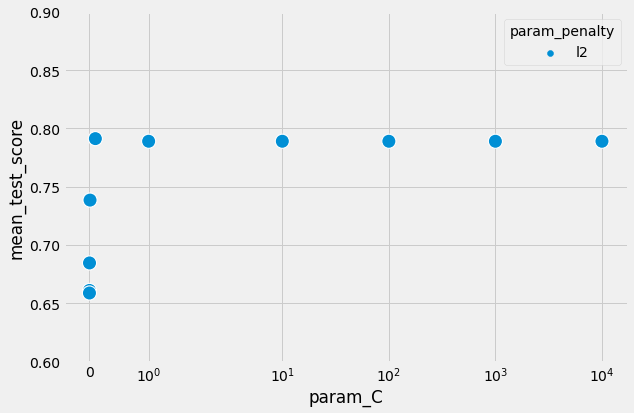

In [53]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.6,0.9))

plt.show()

## 2. Random Search

In [54]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [55]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X2, Y2)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(multi_class='ovr'),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [56]:
print("Best parameters      : ", rs_cv.best_params_, "\n")
print("All precision values : ", rs_cv.cv_results_['mean_test_score'], "\n")
print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 0.001} 

All precision values :  [0.66640325 0.75416141 0.73715831 0.73715831        nan 0.73715831
        nan        nan        nan        nan] 

Best precision value :  0.7541614087666718


In [57]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs

,param_penalty,param_C,mean_test_score
1,l2,0.001,0.754161
2,l2,10,0.737158
3,l2,1,0.737158
5,l2,1000,0.737158
0,l2,0.0001,0.666403
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,1e-05,NaN


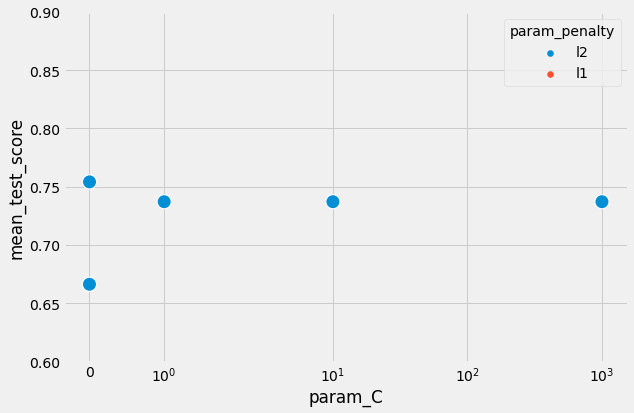

In [59]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.6,0.9))

plt.show()